# <font color = 'black'>  --------------------Spatiotemporal Assignment --------------------- <font>

<font color='maroon'>Name:  Manisha Takale </font>


<font color='maroon'>SNR: 2032988</font>

## <font color='blue'>Part1: Periodicity Analysis of Trajectory Data<font>

### <font color=purple > **Load Data** </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()
from datetime import datetime, date, time
import numpy as np 
from mpl_toolkits import mplot3d

/Users/toothless/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

traj_data = pd.read_csv('2032988_traj.csv')
traj_data = traj_data.loc[:, ~traj_data.columns.str.contains('^Unnamed')]
traj_data.head()


,time,latitude,longitude
0,737029.354167,-10.921742,-37.050753
1,737029.355556,-10.922735,-37.051071
2,737029.356944,-10.921850,-37.052489
3,737029.358333,-10.922182,-37.050312
4,737029.359722,-10.921861,-37.051688


#### 1.1 Find the earliest date and the most recent date for the dataset.
#### Ans : Earilest Date 2018-12-01 and The most recent 2018-12-08


In [140]:
from matplotlib.dates import num2date
dates = traj_data['time']
dates = dates.astype(int)

#Conver to YY/MM/DD format
dates_yymmdd = num2date(dates)
traj_data['date'] = dates_yymmdd
traj_data['date_1'] = traj_data['date'].dt.strftime('%Y-%m-%d')

print('Earilest Date {}'.format(min(traj_data['date_1'])))
print('The most recent {}'.format(max(traj_data['date_1'])))

Earilest Date 2018-12-01
The most recent 2018-12-08


#### 1.2 Find the time interval for the dataset. Is it constant?

#### Ans : Time interval of dataset is constant i.e. 0.00139

In [127]:
# number of intervals per date
traj_data.groupby(['date']).count()

,level_0,index,time,latitude,longitude,time_interval,distance
date,,,,,,,
2018-12-01 00:00:00+00:00,465,465,465,465,465,465,465
2018-12-02 00:00:00+00:00,720,720,720,720,720,720,720
2018-12-03 00:00:00+00:00,720,720,720,720,720,720,720
2018-12-04 00:00:00+00:00,720,720,720,720,720,720,720
2018-12-05 00:00:00+00:00,720,720,720,720,720,720,720
2018-12-06 00:00:00+00:00,720,720,720,720,720,720,720
2018-12-07 00:00:00+00:00,720,720,720,720,720,720,720
2018-12-08 00:00:00+00:00,255,255,255,255,255,255,255


In [128]:
time = traj_data['time'].values

time_interval = [0]
for i in range(0,len(time)-1):
    new_time = (time[i+1] - time[i])
    time_interval.append(new_time)
    
traj_data['time_interval'] = time_interval

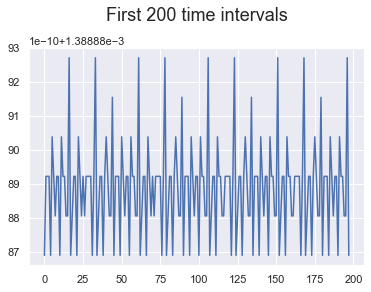

In [129]:
plt.plot(time_interval[2:200])
plt.title('First 200 time intervals\n',fontsize=18);

#### 1.3 Plot the latitude vs longitude.

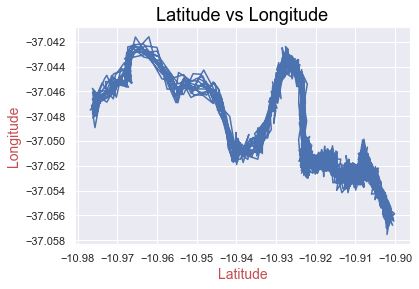

In [130]:
ax = plt.subplot(111)
ax.plot(traj_data['latitude'], traj_data['longitude'])
ax.set_xlabel("Latitude", fontsize=14,color='r')
ax.set_ylabel("Longitude",fontsize=14,color='r')
ax.set_title('Latitude vs Longitude',fontsize=18, color='black')
plt.show()

#### 1.4 Create a 3D plot of the latitude vs longitude vs time.

In [131]:
import matplotlib.dates as mdates

In [145]:
traj_data.head()

,level_0,index,time,latitude,longitude,date,time_interval,distance,date_1
0,0,0,737029.354167,-10.921742,-37.050753,2018-12-01 00:00:00+00:00,0.000000,38.626969,2018-12-01
1,1,1,737029.355556,-10.922735,-37.051071,2018-12-01 00:00:00+00:00,0.001389,38.627555,2018-12-01
2,2,2,737029.356944,-10.921850,-37.052489,2018-12-01 00:00:00+00:00,0.001389,38.628665,2018-12-01
3,3,3,737029.358333,-10.922182,-37.050312,2018-12-01 00:00:00+00:00,0.001389,38.626670,2018-12-01
4,4,4,737029.359722,-10.921861,-37.051688,2018-12-01 00:00:00+00:00,0.001389,38.627899,2018-12-01


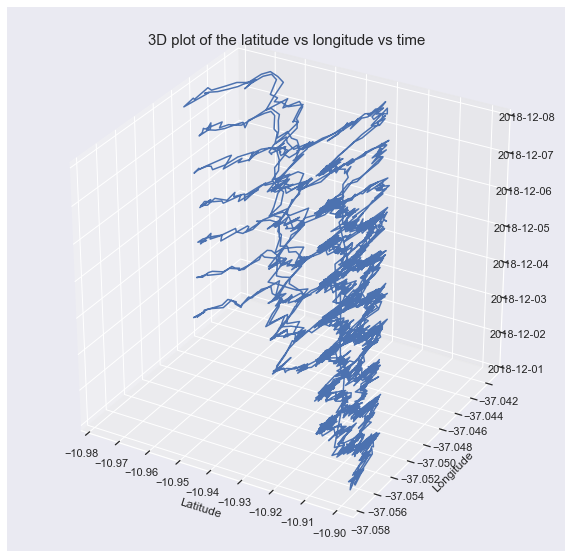

In [144]:
lat = traj_data['latitude'].values
long = traj_data['longitude'].values
date = mdates.date2num(traj_data['date'].values)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.plot( lat,long,date,label=str(1))
ax.zaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('3D plot of the latitude vs longitude vs time',fontsize=15)
plt.show()

#### 1.5 Compute the temporal auto correlation. Display the autocorelation in a plot. (Hint: you can combine latitude and longitude into one value (e.g. latitude $^2$ + longitude $^2$)). Can you find the periodicity of the two trajectories.



In [39]:
from pandas import Series 
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

In [40]:
traj_data['distance'] =  np.sqrt((traj_data['longitude'] * traj_data['longitude'])  +
                             (traj_data['latitude'] * traj_data['latitude']))

print('\tTemporal auto correlation :\n\t{}'.format(Series.autocorr(traj_data.distance)))

	Temporal auto correlation :
	0.9540673145100488


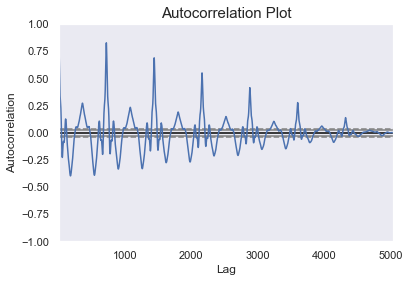

In [41]:
fig = plt.figure()
ax = autocorrelation_plot(traj_data.distance)
plt.title('Autocorrelation Plot',fontsize=15)
plt.show()

<Figure size 432x288 with 0 Axes>

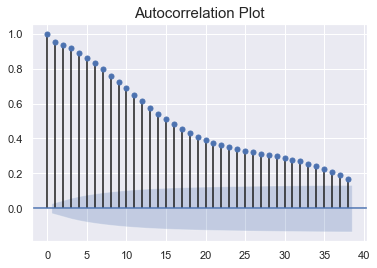

In [47]:
fig = plt.figure();
ax = plot_acf(traj_data['distance'])
plt.title('Autocorrelation Plot',fontsize=15)
plt.show()

In [37]:
traj_data['distance'].autocorr()

0.9540673145100488

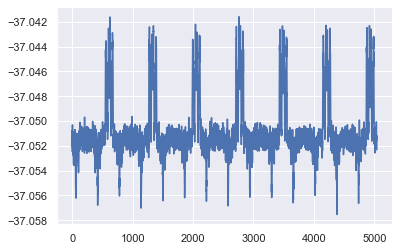

In [161]:
plt.plot(long)
plt.title('longitude')

Text(0.5, 1.0, 'Latitude')

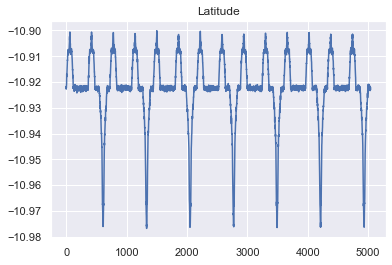

In [162]:
plt.plot(lat)
plt.title('Latitude')

#### 1.6 Evaluate the periodicity of the dataset with a periodogram.

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from scipy import signal

In [30]:
traj_data.reset_index(inplace=True)

In [31]:
traj_data_1 = traj_data.set_index('date')

In [83]:
traj_data_1

,level_0,index,time,latitude,longitude,time_interval,distance
date,,,,,,,
2018-12-01,0,0,737029.354167,-10.921742,-37.050753,0.000000,38.626969
2018-12-01,1,1,737029.355556,-10.922735,-37.051071,0.001389,38.627555
2018-12-01,2,2,737029.356944,-10.921850,-37.052489,0.001389,38.628665
2018-12-01,3,3,737029.358333,-10.922182,-37.050312,0.001389,38.626670
2018-12-01,4,4,737029.359722,-10.921861,-37.051688,0.001389,38.627899
...,...,...,...,...,...,...,...
2018-12-08,5035,5035,737036.347222,-10.923129,-37.051736,0.001389,38.628304
2018-12-08,5036,5036,737036.348611,-10.922555,-37.051087,0.001389,38.627519
2018-12-08,5037,5037,737036.350000,-10.921978,-37.052321,0.001389,38.628540


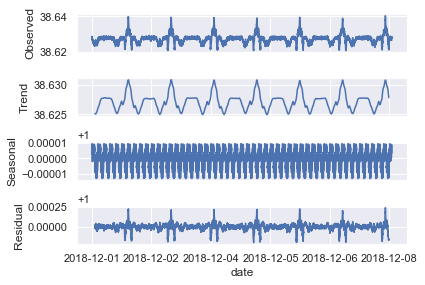

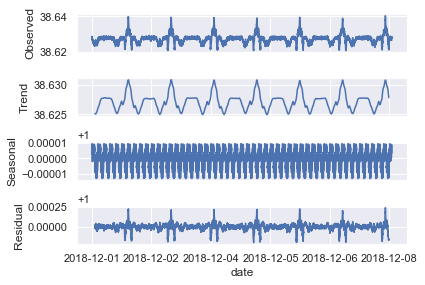

In [289]:
res = seasonal_decompose(traj_data_1.distance, model='multiplicative',  freq=100)
res.plot()

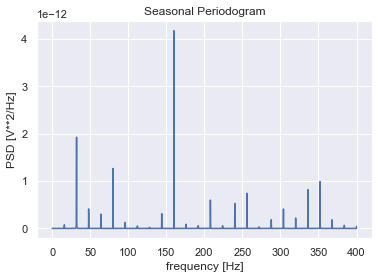

In [63]:
fs = 800

plt.figure()
f, Pxx_den = signal.periodogram(res.seasonal, fs)
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.title('Seasonal Periodogram')
plt.show()

### 1.7 Denoise the trajectory data. Compare the performance of of autocorrelation plot and periodogram with the original data.

In [96]:
geomertry = [xy for xy in zip(traj_data['longitude'],traj_data['latitude'])]

In [167]:
long = traj_data['longitude'].values
lat = traj_data['latitude'].values

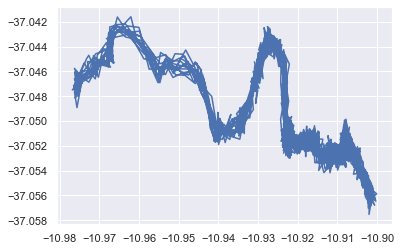

In [168]:
plt.plot(lat,long)
plt.show()

In [169]:
## Find the extended time of vehical wait to divide trajectories

time = traj_data['time'].values

time_interval = []
for i in range(0,len(time)-1):
    new_time = (time[i+1] - time[i])
    time_interval.append(new_time)

In [170]:
print('Highest wait time',(max(time_interval)))

Highest wait time 0.0013888892717659473


In [172]:
print('Lowest wait time', min(time_interval))

Lowest wait time 0.0013888885732740164


In [175]:
wait_interval = []
for i in traj_data['time_interval']:
    if i == 0.0013888892717659473:
        wait_interval.append(1)
    else:
        wait_interval.append(0)
traj_data['wait_interval'] = wait_interval

In [176]:
traj_data.head()

,level_0,index,time,latitude,longitude,date,time_interval,distance,date_1,wait_interval
0,0,0,737029.354167,-10.921742,-37.050753,2018-12-01 00:00:00+00:00,0.000000,38.626969,2018-12-01,0
1,1,1,737029.355556,-10.922735,-37.051071,2018-12-01 00:00:00+00:00,0.001389,38.627555,2018-12-01,0
2,2,2,737029.356944,-10.921850,-37.052489,2018-12-01 00:00:00+00:00,0.001389,38.628665,2018-12-01,0
3,3,3,737029.358333,-10.922182,-37.050312,2018-12-01 00:00:00+00:00,0.001389,38.626670,2018-12-01,0
4,4,4,737029.359722,-10.921861,-37.051688,2018-12-01 00:00:00+00:00,0.001389,38.627899,2018-12-01,0


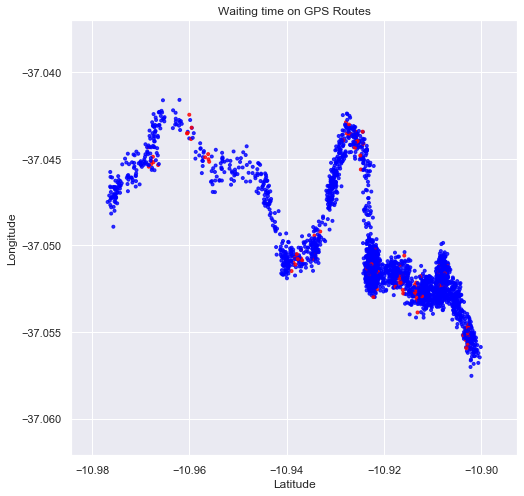

In [205]:
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(8,8))
      #applies the custom color map along with the color sequence
ax.scatter(traj_data['latitude'], traj_data['longitude'], alpha = .8, c=traj_data['wait_interval'],
           cmap=cm.bwr,marker='.')
ax.set_title('Waiting time on GPS Routes')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.show()

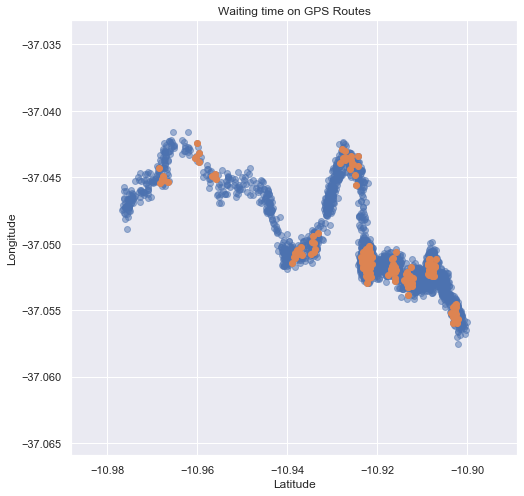

In [208]:
df_temp = traj_data[traj_data['wait_interval']==1]

fig, ax = plt.subplots(figsize=(8,8))
      #applies the custom color map along with the color sequence
ax.scatter(traj_data['latitude'], traj_data['longitude'], alpha = .5)
ax.scatter(df_temp['latitude'], df_temp['longitude'])
ax.set_title('Waiting time on GPS Routes')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.show()

# Part 2 : Spatial analysis of incidences of virus X in California

### 2.1 Load the dataset.Display the latitude and longitude in a scatterplot with a colormap corresponding to incidences of virus X.

In [212]:
import geopandas as gpd
import pandas as pd

In [213]:
ca_shape = gpd.read_file("CA_Counties_TIGER2016.shp")
spaatial_data = pd.read_csv("2032988_spatial.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
spaatial_data = spaatial_data.loc[:, ~spaatial_data.columns.str.contains('^Unnamed')]

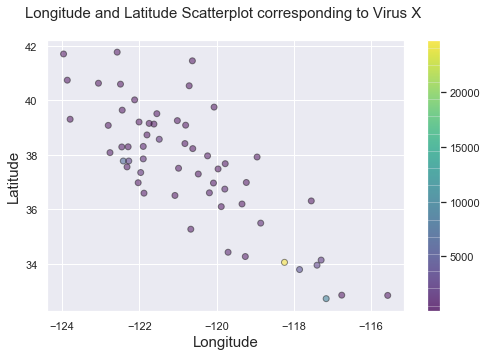

In [214]:
plt.figure(figsize = (8,5))
plt.scatter(spaatial_data["longitude"], spaatial_data["latitude"], c = spaatial_data['Virus X'], 
            cmap = 'viridis', alpha=0.5, lw = 1, facecolor = 'b', edgecolor='k')
plt.colorbar()
plt.xlabel('Longitude',fontsize=15)
plt.ylabel('Latitude',fontsize=15)
plt.title('Longitude and Latitude Scatterplot corresponding to Virus X \n', fontsize=15,loc='center');
plt.show()

### 2.2 Check if the data is normally distributed by a histogram and normal quantile-quantile plot(qqplot).

If the data is NOT normally distributed, perform some transformation on this data so that
the data is normally distributed. For example, you can apply a sine, cosine, exponential or logarithmic
transformation.

In [215]:
from scipy.stats import norm 
import scipy.stats as stats

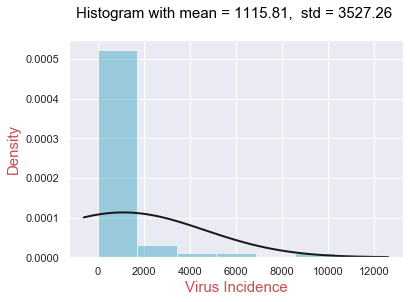

In [216]:
hrange = (0,12000)
mu, std = norm.fit(spaatial_data["Virus X"])
ahist=plt.hist(spaatial_data["Virus X"], bins=7, density=True, alpha=0.6, color='c', range=hrange)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Histogram with mean = %.2f,  std = %.2f \n" % (mu, std)
th=plt.title(title, fontsize=15,color='black')
xh=plt.xlabel('Virus Incidence',fontsize=15,color='r')
yh=plt.ylabel('Density',fontsize=15,color='r')

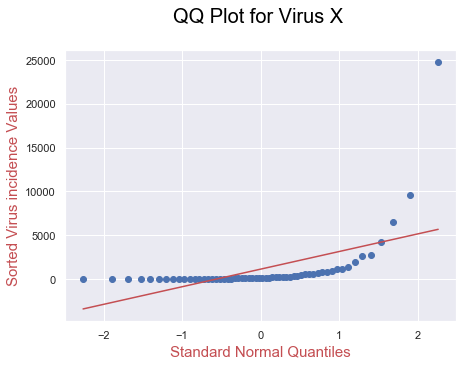

In [217]:
qqdata = stats.probplot(spaatial_data["Virus X"], dist="norm", plot=plt, fit=False)
xh=plt.xlabel('Standard Normal Quantiles',fontsize=15,color='r')
yh=plt.ylabel('Sorted Virus incidence Values',fontsize=15,color='r')
fig=plt.gcf()
fig.set_size_inches(7, 5)
th=plt.title('QQ Plot for Virus X \n',fontsize=20,color='black')

In [218]:
spaatial_data["ViruS_log"] = np.log(spaatial_data["Virus X"])

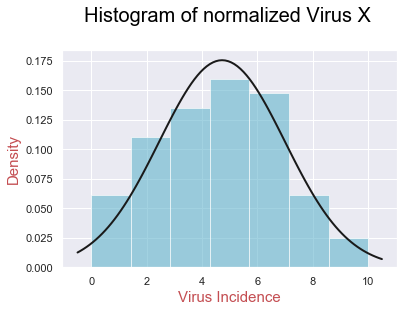

In [219]:
hrange = (0,10)
mu, std = norm.fit(spaatial_data["ViruS_log"])
ahist=plt.hist(spaatial_data["ViruS_log"], bins=7, density=True, alpha=0.6, color='c', range=hrange)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
th=plt.title("Histogram of normalized Virus X \n",fontsize=20,color='black')
xh=plt.xlabel('Virus Incidence' ,fontsize=15,color='r')
yh=plt.ylabel('Density',fontsize=15,color='r')

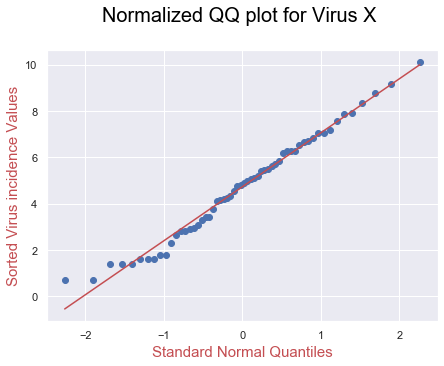

In [220]:
qqdata = stats.probplot(spaatial_data["ViruS_log"], dist="norm", plot=plt, fit=False)
xh=plt.xlabel('Standard Normal Quantiles',fontsize=15,color='r')
yh=plt.ylabel('Sorted Virus incidence Values',fontsize=15,color='r')
fig=plt.gcf()
fig.set_size_inches(7, 5)
th=plt.title('Normalized QQ plot for Virus X \n',fontsize=20,color='black')

### 2.3 Compute pairwise distances between the two points. Visualize the spatial lag in a scatterplot.Try different lag values to and the point when the autocorrelation is negligible.

In [221]:
from scipy.spatial.distance import pdist , squareform
from pandas.plotting import autocorrelation_plot

In [222]:
spaatial_data.head()

,name,capital,population,latitude,longitude,Virus X,ViruS_log
0,Sierra,Downieville,3380,36.985898,-119.232078,6,1.791759
1,Sacramento,Sacramento,1424415,38.573659,-121.487147,1320,7.185387
2,Santa Barbara,Santa Barbara,428655,34.423403,-119.704416,795,6.678342
3,Calaveras,San Andreas,46127,38.231085,-120.619990,4,1.386294
4,Ventura,Ventura,831587,34.265900,-119.258366,341,5.831882


In [223]:
data_points = spaatial_data[['longitude','latitude','ViruS_log']].values
data_pwdist = squareform(pdist(data_points[:,:2]))

In [224]:
data_pwdist

array([[0.        , 2.75795598, 2.60566379, ..., 2.8012934 , 4.17112586,
        2.23931359],
       [2.75795598, 0.        , 4.51694085, ..., 1.68664741, 1.43734099,
        3.40355284],
       [2.60566379, 4.51694085, 0.        , ..., 3.45679919, 5.89682963,
        1.28416113],
       ...,
       [2.8012934 , 1.68664741, 3.45679919, ..., 0.        , 2.69773324,
        2.18544131],
       [4.17112586, 1.43734099, 5.89682963, ..., 2.69773324, 0.        ,
        4.72114378],
       [2.23931359, 3.40355284, 1.28416113, ..., 2.18544131, 4.72114378,
        0.        ]])

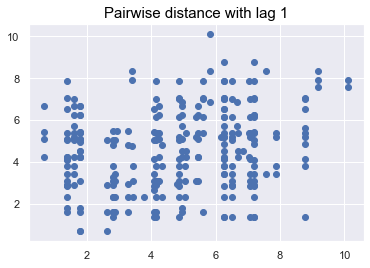

In [292]:
start_p = 0.5

lag_p = 1
i, j = np.where((data_pwdist >= lag_p - start_p) & (data_pwdist < lag_p + start_p))
indices=np.c_[i, j][np.where(j > i)]
plt.figure()
plt.scatter(data_points[indices[:, 0],2],data_points[indices[:, 1],2])
plt.title('Pairwise distance with lag 1',fontsize=15,color='black');

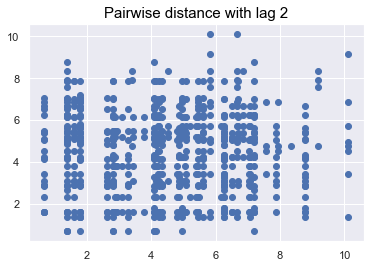

In [279]:
start_p = 1

lag_p = 2
i, j = np.where((data_pwdist >= lag_p - start_p) & (data_pwdist < lag_p + start_p))
indices=np.c_[i, j][np.where(j > i)]
plt.figure()
plt.scatter(data_points[indices[:, 0],2],data_points[indices[:, 1],2])
plt.title('Pairwise distance with lag 2',fontsize=15,color='black');

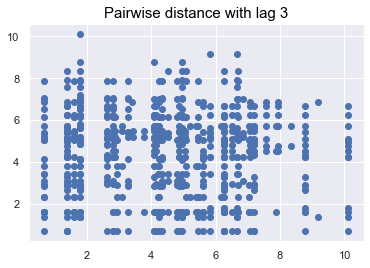

In [280]:
start_p = 1

lag_p = 3
i, j = np.where((data_pwdist >= lag_p - start_p) & (data_pwdist < lag_p + start_p))
indices=np.c_[i, j][np.where(j > i)]
plt.figure()
plt.scatter(data_points[indices[:, 0],2],data_points[indices[:, 1],2])
plt.title('Pairwise distance with lag 3',fontsize=15,color='black');

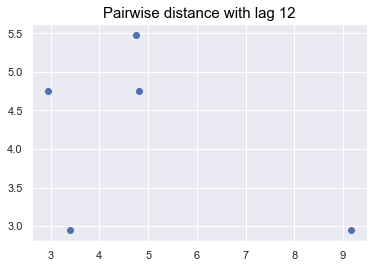

In [297]:
start_p = 1

lag_p = 12
i, j = np.where((data_pwdist >= lag_p - start_p) & (data_pwdist < lag_p + start_p))
indices=np.c_[i, j][np.where(j > i)]
plt.figure()
plt.scatter(data_points[indices[:, 0],2],data_points[indices[:, 1],2])
plt.title('Pairwise distance with lag 12',fontsize=15,color='black');

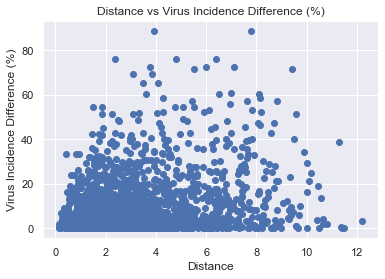

In [295]:
distance= []
por_diff = []
psize = data_points[:,:2].shape
#print(psize)

for i in np.arange(0,psize[0],1):
    for j in np.arange(i+1,psize[0],1):
        diffx = data_points[i,:][0] - data_points[j,:][0]
        diffy = data_points[i,:][1] - data_points[j,:][1]
        diffpor = data_points[i,:][2] - data_points[j,:][2]
        distance.append(np.sqrt(diffx*diffx + diffy*diffy))
        por_diff.append(diffpor*diffpor)

plt.scatter(distance,por_diff)
plt.title('Distance vs Virus Incidence Difference (%)')
plt.xlabel('Distance')
plt.ylabel('Virus Incidence Difference (%)');

### 2.4 Compute the variogram. Fits a variogram model over the data. Which variogram model(e.g. spherical, linear etc..) best fits the data?

Reference - https://github.com/cjohnson318/geostatsmodels/tree/master/geostatsmodels

In [229]:
# Functions to calculate lag indices and semi variance

def lagindices(np_data,lag,start_p):
    i, j = np.where((np_data >= lag - start_p) & (np_data < lag + start_p))
    indices=np.c_[i, j][np.where(j > i)]
    return indices

def semivariance(data, indices):
    z=(data[indices[:, 0], 2] - data[indices[:, 1], 2])**2.0
    return np.mean(z) / 2.0


In [230]:
data_points = spaatial_data[['longitude','latitude','ViruS_log']].values
data_pwdist = squareform(pdist(data_points[:,:2]))

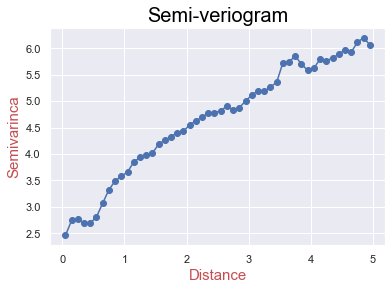

In [231]:
start_p = 0.8
lag = 0.6

tolerance = 0.05
lags = np.arange(tolerance, 5, tolerance*2)
data_pwdist = squareform(pdist(data_points[:,:2]))

# create a list of lists of indices of points having the ~same lag
index = [lagindices(data_pwdist, lag, start_p) for lag in lags]
# remove indexs which are empty 
index = list(filter(lambda x: len(x) > 0, index))
     
v = [semivariance(data_points, indices) for indices in index]

plt.figure()
plt.plot(lags,v,'o-')
plt.xlabel('Distance',fontsize=15,color='r')
plt.ylabel('Semivarinca',fontsize=15,color='r')
plt.title('Semi-veriogram',fontsize=20,color='black');

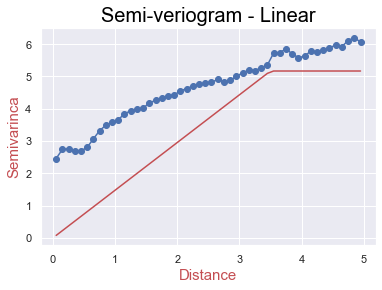

In [232]:
import variogram_model as model
sill = np.var(data_points[:, 2])
variogram_model1 = model.semivariance(model.linear, [3.5, sill])

plt.figure()
plt.plot(lags,v,'o-')
plt.plot(lags, variogram_model1(lags), 'r')
plt.xlabel('Distance',fontsize=15,color='r')
plt.ylabel('Semivarinca',fontsize=15,color='r')
plt.title('Semi-veriogram - Linear',fontsize=20,color='black');

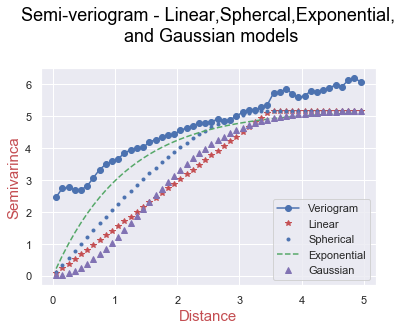

In [233]:
model1 = model.semivariance(model.linear, [3.5, sill])
model2 = model.semivariance(model.spherical, [3.5, sill])
model3 = model.semivariance(model.exponential, [3.5, sill])
model4 = model.semivariance(model.gaussian, [3.5, sill])

plt.plot(lags,v,'o-', label = 'Veriogram')
plt.plot(lags, model1(lags), '*r' , label = 'Linear')
plt.plot(lags, model2(lags), '.b' , label = 'Spherical')
plt.plot(lags, model3(lags), '--g', label = 'Exponential') 
plt.plot(lags, model4(lags), '^m', label = 'Gaussian')

plt.xlabel('Distance',fontsize=15,color='r')
plt.ylabel('Semivarinca',fontsize=15,color='r')
plt.title('Semi-veriogram - Linear,Sphercal,Exponential,\n and Gaussian models\n',fontsize=18,color='black');
plt.legend()
plt.show()


### 2.5 Compute the number of incidences of virus X at the following latitude and longtitudes: -120,35 and -121,37 You can use interpolation techniques such as kriging to estimate the number of incidences.

In [234]:
import kriging

In [235]:
covfct = model.covariance(model.spherical, (5, sill)) 
kriging.simple(data_points, covfct, [-120, 35], N=10) 

(6.204086104301012, 1.001757541507741)

In [236]:
covfct = model.covariance(model.spherical, (3, sill))
kriging.simple(data_points, covfct, [-121, 37], N=10)

(3.9462551238129286, 1.091566998115981)

### 2.6 Load and display the shape file for the CA counties.

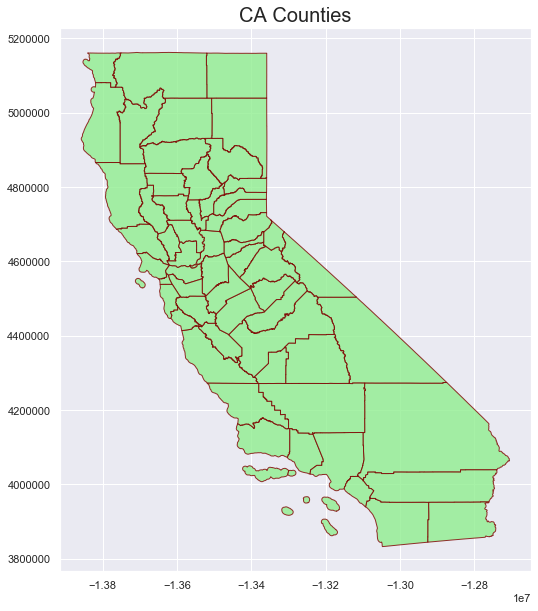

In [237]:
ca = gpd.read_file("CA_Counties_TIGER2016.shp")
ca.plot(figsize=(10, 10), alpha=0.8, facecolor = 'lightgreen', edgecolor='maroon')
plt.title('CA Counties',fontsize=20);

/Users/toothless/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


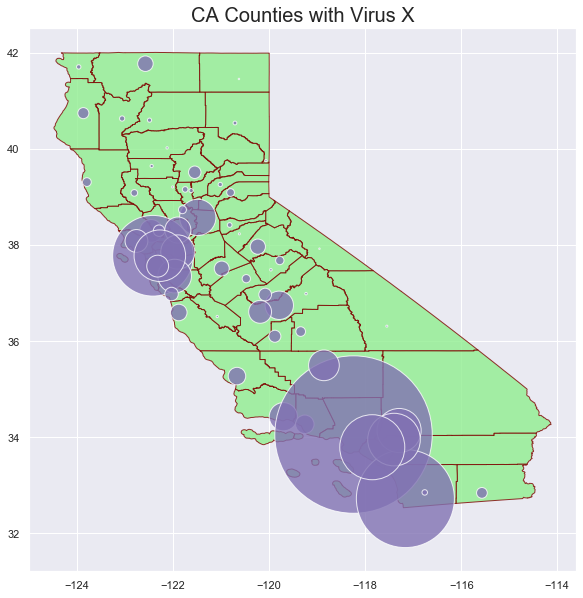

In [241]:
poly_area = []

for index, row in ca.iterrows():
    poly_area.append(row['geometry'].area)

ca['area'] = poly_area   

camap = ca.to_crs({'init': 'epsg:4326'}) 
ax = camap.plot(figsize=(10, 10),alpha=0.8, facecolor = 'lightgreen', edgecolor='maroon')
ax.scatter(spaatial_data["longitude"], spaatial_data["latitude"], spaatial_data['Virus X'], 
           alpha=0.8, facecolor = 'm', edgecolor='w')
plt.title('CA Counties with Virus X',fontsize=20);
plt.show()

### 2.7 Compute with different spatial weights. How does the global and local spatial autocorrelation differ when you use different weighting schemes?

In [242]:
import pysal as ps
import libpysal as lps

In [243]:
ca[["population",'longitude','latitude','ViruS_log']] = spaatial_data[['population','longitude',
                                                                       'latitude','ViruS_log']]

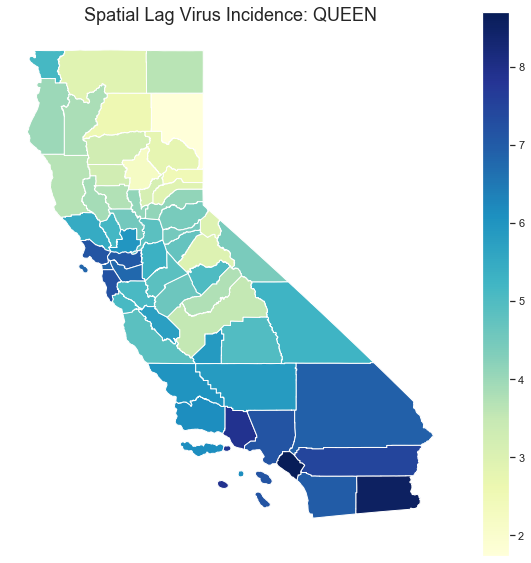

In [244]:
qW = lps.weights.Queen.from_dataframe(ca)
qW.transform = 'r'

qWViruS_log= lps.weights.lag_spatial(qW, ca['ViruS_log']) 

f, ax = plt.subplots(1, figsize=(10,10))
ca.assign(cl=qWViruS_log).plot(column='cl', k=5, cmap = "YlGnBu",  ax=ax, edgecolor='w', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Virus Incidence: QUEEN",fontsize=18)
plt.show()

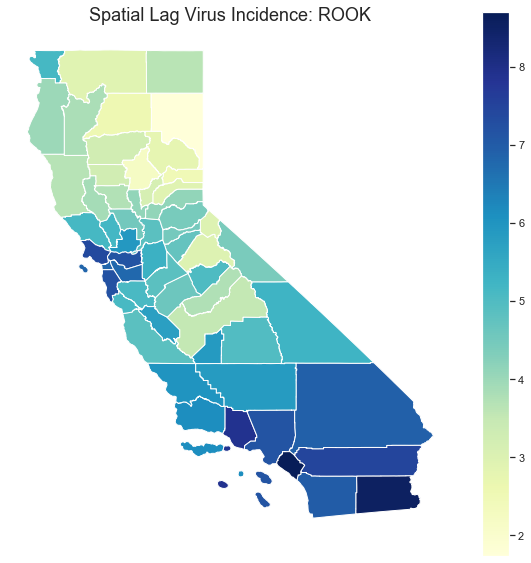

In [245]:
qR = lps.weights.Rook.from_dataframe(ca)
qR.transform = 'r'

qRViruS_log = lps.weights.lag_spatial(qR, ca['ViruS_log']) 

f, ax = plt.subplots(1, figsize=(10,10))
ca.assign(cl=qRViruS_log).plot(column='cl', k=5, cmap = "YlGnBu",  ax=ax, edgecolor='w', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Virus Incidence: ROOK",fontsize=18)
plt.show()

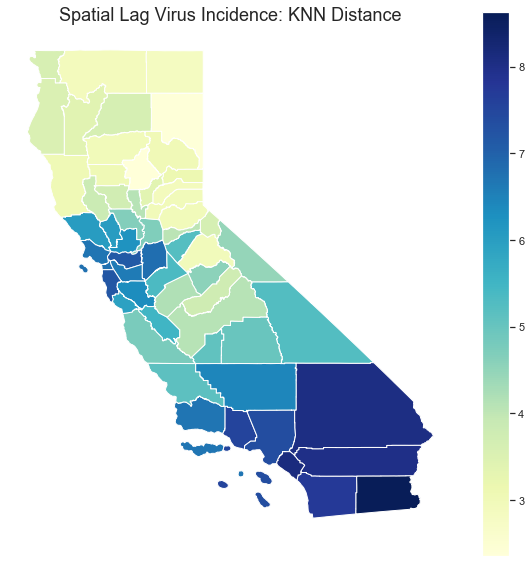

In [246]:
N = lps.weights.KNN.from_dataframe(ca,k=5)
N.transform = 'r'

NViruS_log = lps.weights.lag_spatial(N, ca['ViruS_log']) 

f, ax = plt.subplots(1, figsize=(10,10))
ca.assign(cl=NViruS_log).plot(column='cl', k=5, cmap = "YlGnBu",  ax=ax, edgecolor='w', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Virus Incidence: KNN Distance",fontsize=18)
plt.show()

In [247]:
#calculate population density 
ca['pop_Density'] = (ca['population'] / ca['area'])* 1000000

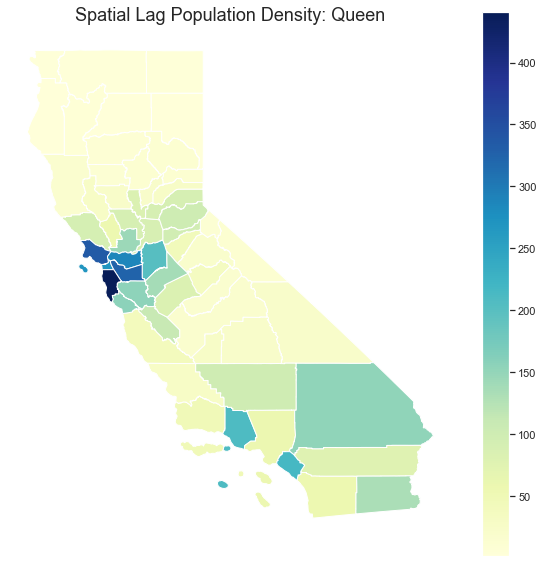

In [248]:
qWpp = lps.weights.Queen.from_dataframe(ca)
qWpp.transform = 'r'

# compute spatial lag virus
qWpp_pop_D = lps.weights.lag_spatial(qWpp, ca['pop_Density'] ) 

f, ax = plt.subplots(1, figsize=(10,10))
ca.assign(cl=qWpp_pop_D).plot(column='cl', k=5, cmap = "YlGnBu",  ax=ax, edgecolor='w', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Population Density: Queen",fontsize=18)
plt.show()


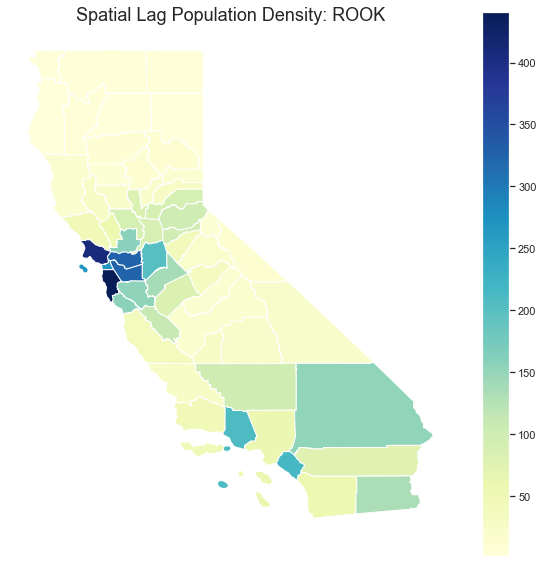

In [249]:
RKpp = lps.weights.Rook.from_dataframe(ca)
RKpp.transform = 'r'

# compute spatial lag virus
RKpp_pop_D = lps.weights.lag_spatial(RKpp, ca['pop_Density'] ) 

f, ax = plt.subplots(1, figsize=(10,10))
ca.assign(cl=RKpp_pop_D).plot(column='cl', k=5, cmap = "YlGnBu",  ax=ax, edgecolor='w', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Population Density: ROOK",fontsize=18)
plt.show()

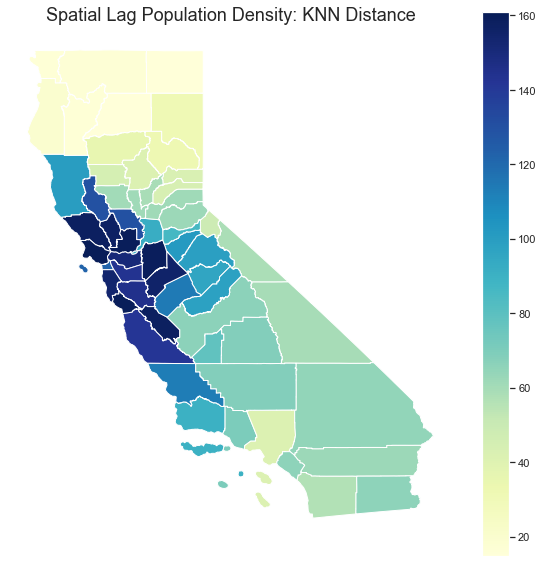

In [250]:
KNpp = lps.weights.KNN.from_dataframe(ca,k=20)
KNpp.transform = 'r'

KNpp_pop_D = lps.weights.lag_spatial(KNpp, ca['pop_Density']) 

f, ax = plt.subplots(1, figsize=(10,10))
ca.assign(cl=KNpp_pop_D).plot(column='cl', k=5, cmap = "YlGnBu",  ax=ax, edgecolor='w', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Population Density: KNN Distance",fontsize=18)
plt.show()

In [251]:
import esda as es

In [252]:
global_v =  es.moran.Moran(ca['ViruS_log'].values, qW)
print('Virus Incidence(Queen):        \n{} \nGlobal Autocorrelation: \n{}'.format(global_v.I, global_v.p_sim))

Virus Incidence(Queen):        
0.45618526216984007 
Global Autocorrelation: 
0.001


In [253]:
# Global correlation on Virus: ROOK
global_VR =  es.moran.Moran(ca['ViruS_log'].values, qR)
print('Virus Incidence(Rook):        \n{} \nGlobal Autocorrelation: \n{}'.format(global_VR.I, global_VR.p_sim))

Virus Incidence(Rook):        
0.4562902629729805 
Global Autocorrelation: 
0.001


In [254]:
# Global correlation on Virus: KNN
global_VNN =  es.moran.Moran(ca['ViruS_log'].values, N)
print('Virus Incidence(KNN):        \n{} \nGlobal Autocorrelation: \n{}'.format(global_VNN.I, global_VNN.p_sim))

Virus Incidence(KNN):        
0.5170617409520007 
Global Autocorrelation: 
0.001


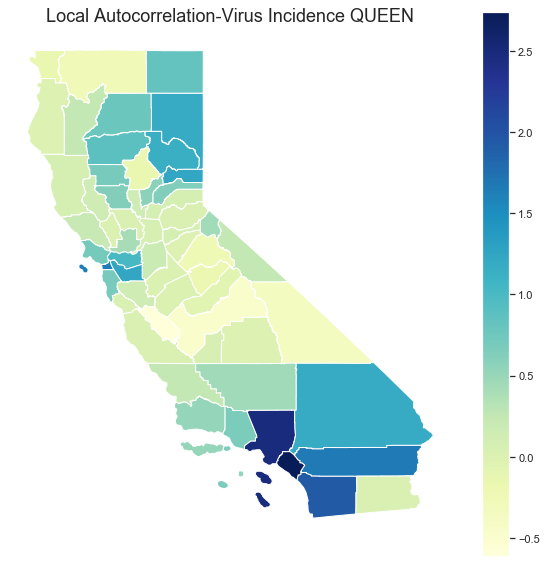

In [301]:
# Local Correlation on Virus: QUEEN
local_v = es.moran.Moran_Local(ca["ViruS_log"].values, qW)

f, ax = plt.subplots(1, figsize=(10, 10))
ca.assign(cl=local_v.Is).plot(column='cl', k=5,  cmap='YlGnBu',  ax=ax, edgecolor='w', legend=True, )
ax.set_axis_off()
plt.title("Local Autocorrelation-Virus Incidence QUEEN",fontsize=18)
plt.show()

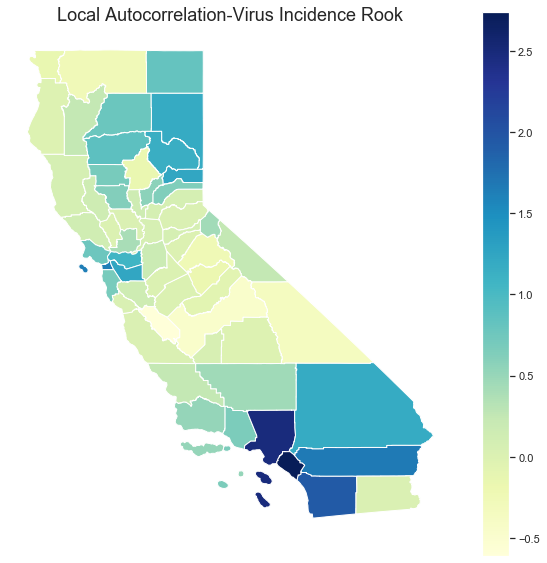

In [256]:
# Local Correlation on Virus: ROOK
local_vR = es.moran.Moran_Local(ca["ViruS_log"].values, qR)

f, ax = plt.subplots(1, figsize=(10, 10))
ca.assign(cl=local_vR.Is).plot(column='cl', k=5,  cmap='YlGnBu',  ax=ax, edgecolor='w', legend=True)
ax.set_axis_off()
plt.title("Local Autocorrelation-Virus Incidence Rook",fontsize=18)
plt.show()

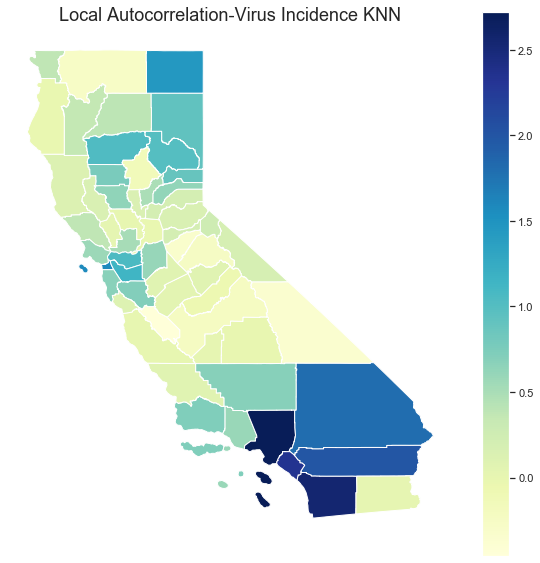

In [257]:
# Local Correlation on Virus: KNN
local_vN = es.moran.Moran_Local(ca["ViruS_log"].values, N)

f, ax = plt.subplots(1, figsize=(10, 10))
ca.assign(cl=local_vN.Is).plot(column='cl', k=5,  cmap='YlGnBu',  ax=ax, edgecolor='w', legend=True)
ax.set_axis_off()
plt.title("Local Autocorrelation-Virus Incidence KNN",fontsize=18)
plt.show()

In [258]:
# Global correlation on Population Density: Queen
global_qWpp =  es.moran.Moran(ca['pop_Density'].values, qWpp)
print('Population Density(Queen) Incidence:\n{} \nGlobal Autocorrelation:\n{}'.format(global_qWpp.I, global_qWpp.p_sim))

Population Density(Queen) Incidence:
0.34451382548008136 
Global Autocorrelation:
0.001


In [259]:
# Global correlation on Population Density: Rook
global_RKpp =  es.moran.Moran(ca['pop_Density'].values, RKpp)
print('Population Density(Rook) Incidence:\n{} \nGlobal Autocorrelation:\n{}'.format(global_RKpp.I, global_RKpp.p_sim))

Population Density(Rook) Incidence:
0.35092675620706165 
Global Autocorrelation:
0.001


In [260]:
# Global correlation on Population Density: KNN
global_KNpp =  es.moran.Moran(ca['pop_Density'].values, KNpp)
print('Population Density(KNN) Incidence:\n{} \nGlobal Autocorrelation:\n{}'.format(global_KNpp.I, global_KNpp.p_sim))

Population Density(KNN) Incidence:
0.08925373318755594 
Global Autocorrelation:
0.002


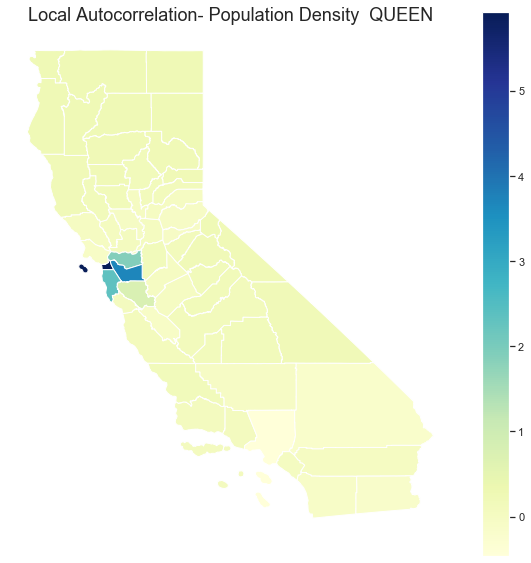

In [261]:
local_qWpp = es.moran.Moran_Local(ca['pop_Density'].values, qWpp)

f, ax = plt.subplots(1, figsize=(10, 10))
ca.assign(cl=local_qWpp.Is).plot(column='cl', k=5,  cmap='YlGnBu',  ax=ax, edgecolor='w', legend=True)
ax.set_axis_off()
plt.title("Local Autocorrelation- Population Density  QUEEN",fontsize=18)
plt.show()

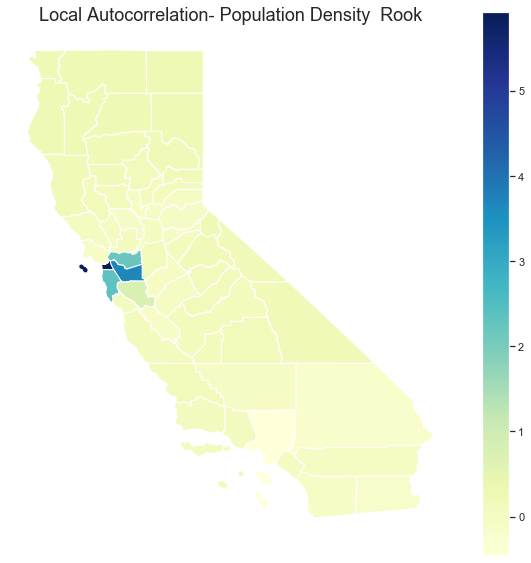

In [262]:
local_RKpp = es.moran.Moran_Local(ca['pop_Density'].values, RKpp)

f, ax = plt.subplots(1, figsize=(10, 10))
ca.assign(cl=local_RKpp.Is).plot(column='cl', k=5,  cmap='YlGnBu',  ax=ax, edgecolor='w', legend=True)
ax.set_axis_off()
plt.title("Local Autocorrelation- Population Density  Rook",fontsize=18)
plt.show()

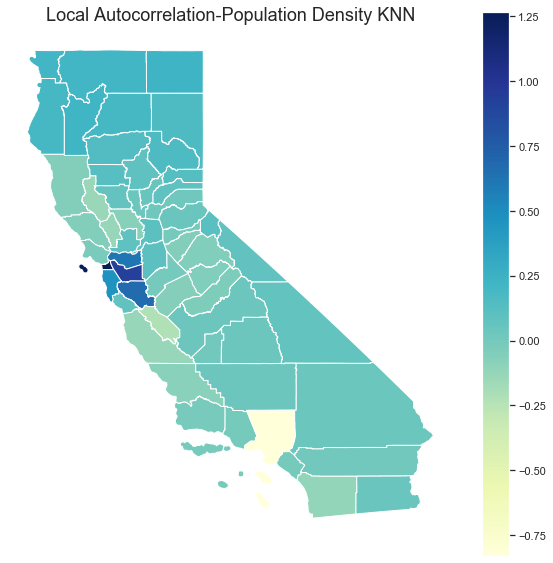

In [263]:
local_KNpp = es.moran.Moran_Local(ca['pop_Density'].values, KNpp)

f, ax = plt.subplots(1, figsize=(10, 10))
ca.assign(cl=local_KNpp.Is).plot(column='cl', k=5,  cmap='YlGnBu',  ax=ax, edgecolor='w', legend=True)
ax.set_axis_off()
plt.title("Local Autocorrelation-Population Density KNN",fontsize=18)
plt.show()

### 2.8 Compute the correlation with population density and the number of cases of Virus X. Is it positively correlated.?

In [264]:
virus = ca['ViruS_log']
pop_d = ca['pop_Density']

In [265]:
print('Correlation of Virus X and Population Density \n{}'.format(virus.corr(pop_d)))

Correlation of Virus X and Population Density 
0.6274819312426173


In [266]:
print ('Pearson correlation coefficients: \n{}'.format(np.corrcoef(virus,pop_d)[0, 1]))

Pearson correlation coefficients: 
0.6274819312426173


In [ ]:
from scipy.stats import spearmanr

coeff, pval = spearmanr(virus,pop_d)
print('Spearman correlation coefficient: \n{} \nand\npvalue {}'.format(coeff,pval))